
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. MLP for regression (*)

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

&nbsp; a) Load the mpg dataset using seaborn. (*)

&nbsp; b) Use your data analysis skills to perform EDA. (*)

&nbsp; c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

&nbsp; d) Can you figure out a way to see if the values filled in are reasonable? (**)

&nbsp; e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

&nbsp; g) Now use early stopping to tune the number of epochs. (*)

&nbsp; h) Train on all training data and validation data. (*)

&nbsp; i) Predict on test data and evaluate. (*)

&nbsp; j) Can you create an MLP model that beats random forest for this dataset? (**)

<details>

<summary>Hint</summary>

d) Perhaps some statistical analysis and visual comparison of similar samples? Also combine with domain skills. 

f) Decide how to do systematic testing and document them.

j) Don't forget about classical machine learning models that we learned in the last course, in many cases they can outperform neural networks. You need to pick the right model for the right problem.

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [ ]:
# #

## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

In [ ]:
# a) 

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# b.1)

mpg.shape
mpg.info(), mpg.describe(include="all"), mpg.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


(None,
                mpg   cylinders  displacement  horsepower       weight  \
 count   398.000000  398.000000    398.000000  392.000000   398.000000   
 unique         NaN         NaN           NaN         NaN          NaN   
 top            NaN         NaN           NaN         NaN          NaN   
 freq           NaN         NaN           NaN         NaN          NaN   
 mean     23.514573    5.454774    193.425879  104.469388  2970.424623   
 std       7.815984    1.701004    104.269838   38.491160   846.841774   
 min       9.000000    3.000000     68.000000   46.000000  1613.000000   
 25%      17.500000    4.000000    104.250000   75.000000  2223.750000   
 50%      23.000000    4.000000    148.500000   93.500000  2803.500000   
 75%      29.000000    8.000000    262.000000  126.000000  3608.000000   
 max      46.600000    8.000000    455.000000  230.000000  5140.000000   
 
         acceleration  model_year origin        name  
 count     398.000000  398.000000    398        

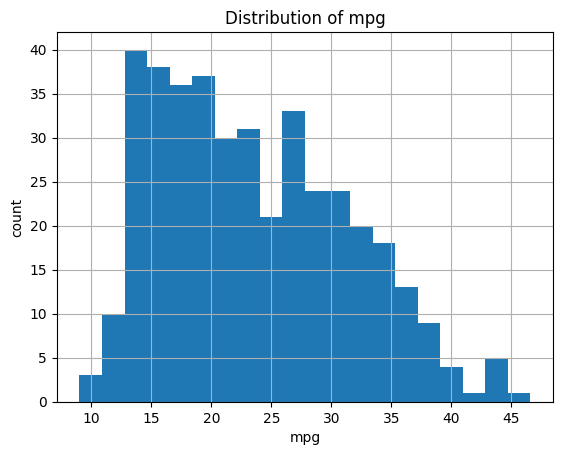

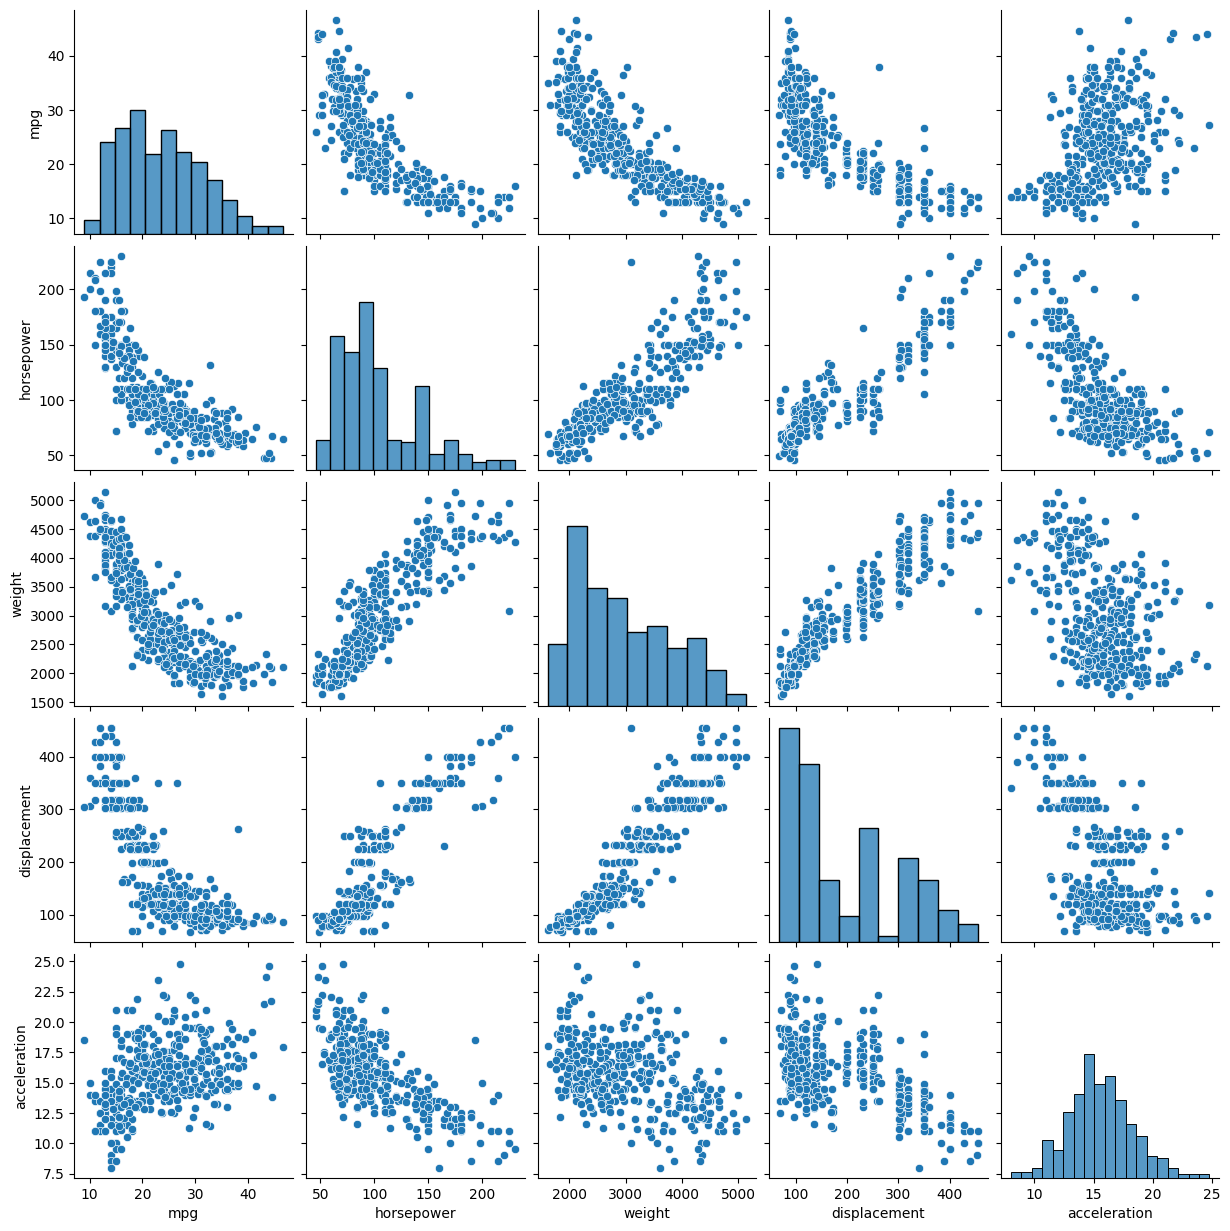

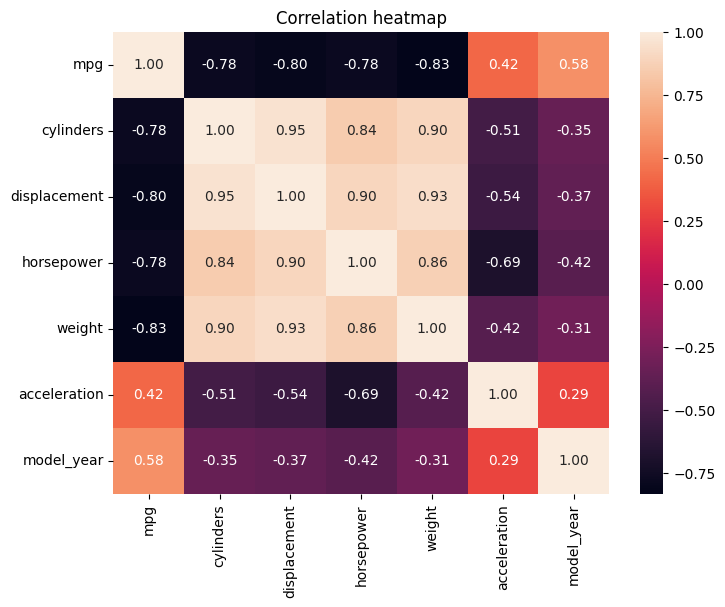

In [7]:
# b.2)

# Histogram of target
mpg['mpg'].hist(bins=20)
plt.xlabel("mpg")
plt.ylabel("count")
plt.title("Distribution of mpg")
plt.show()

# Pairplot for a subset of variables
sns.pairplot(mpg[['mpg', 'horsepower', 'weight', 'displacement', 'acceleration']])
plt.show()

# Correlation heatmap (numeric only)
numeric_cols = mpg.select_dtypes(include=[np.number]).columns
corr = mpg[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 1. Separera rader med/utan horsepower
hp_known = mpg[mpg['horsepower'].notna()].copy()
hp_missing = mpg[mpg['horsepower'].isna()].copy()

feature_cols = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']

# Gör dummy-kodning för hela datasetet så att kolumnerna blir samma
X_all = pd.get_dummies(mpg[feature_cols], columns=['origin'], drop_first=True)

# Plocka ut rätt rader för kända/okända hp
X_hp = X_all.loc[hp_known.index]
X_missing_hp = X_all.loc[hp_missing.index]

y_hp = hp_known['horsepower']

# 2. Träna model
rf_hp = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_hp.fit(X_hp, y_hp)

# 3. Prediktera för saknade rader
hp_pred = rf_hp.predict(X_missing_hp)

# 4. Fyll i
mpg.loc[mpg['horsepower'].isna(), 'horsepower'] = hp_pred


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by RandomForestRegressor.

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]
#£
[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---